# Building community model with Reframed

In [1]:
from reframed import Community, Environment
from reframed import load_cbmodel, FBA, plot_flux_envelope

In [2]:
CAL2 = load_cbmodel("../GEMs/CAL2.xml", flavor="bigg")
SAL9 = load_cbmodel("../GEMs/SAL9.xml", flavor="bigg")
MAM2 = load_cbmodel("../GEMs/MAM2.xml", flavor="bigg")

In [3]:
community = Community('RA_community', [CAL2, SAL9, MAM2])
merged_community = community.merge_models()

Create the environment using the medium composition from the CAL2 model

In [4]:
medium = Environment.from_model(CAL2).apply(merged_community, exclusive=True, inplace=False)

In [6]:
# "archived" environment

# complete_environment = Environment.empty(community)

# cal_medium = Environment.from_model(CAL2)

# uptake_reactions = [reaction for reaction in cal_medium if cal_medium[reaction][0] < 0]

# for reaction in uptake_reactions:
#     complete_environment.update({reaction: (-10.0, float("inf"))})

## Simulating with FBA

In [53]:
solution = FBA(merged_community, constraints=medium, objective=merged_community.biomass_reaction)

print(solution)
solution.show_values(pattern='BIOMASS', sort=True)

Objective: 0.8780107193508996
Status: Optimal

R_BIOMASS_Ec_iHK1487_core_SAL9  0.878011


### distribution of solution on strains

In [18]:
solution.show_values(pattern='MAM2', sort=True)

R_ACALDtex_MAM2 -159.681
R_ACALDtpp_MAM2 -159.681
R_H2Otex_MAM2 -109.44
R_H2Otpp_MAM2 -109.44
R_PTAr_MAM2  -61.9592
R_ACALD_MAM2 -61.4468
R_F6PA_MAM2  -8.69233
R_PGK_MAM2   -3.9729
R_PGM_MAM2   -3.9729
R_TRPAS2_MAM2 -3.6579
R_TRPt2rpp_MAM2 -3.6579
R_TRPtex_MAM2 -3.6579
R_NDPK1_MAM2 -3.5952
R_PPM_MAM2   -2.59911
R_PUNP1_MAM2 -2.59911
R_ADNt2pp_copy2_MAM2 -2.59911
R_ADNtex_MAM2 -2.59911
R_RPE_MAM2   -1.84605
R_RPI_MAM2   -1.81188
R_TKT2_MAM2  -1.00891
R_TALA_MAM2  -0.83714
R_TKT1_MAM2  -0.83714
R_MDH_MAM2   -0.349757
R_FUM_MAM2   -0.349757
R_FUMtex_MAM2 -0.349757
R_FUMt1pp_MAM2 -0.349757
R_CO2tpp_MAM2 -0.171179
R_CO2tex_MAM2 -0.171179
R_TYRt2rpp_MAM2 -0.12127
R_TYRtex_MAM2 -0.12127
R_TYRTA_MAM2 -0.12127
R_ACOAD5f_MAM2 -0.0683309
R_ACOAD3f_MAM2 -0.0683309
R_ACOAD2f_MAM2 -0.0683309
R_ACOAD4f_MAM2 -0.0683309
R_PGAMT_MAM2 -0.0341655
R_ALAR_MAM2  -0.0121994
R_4ABZGLUH_MAM2 -0.000588267
R_4ABZGLUtr_MAM2 -0.000588267
R_4ABZGLUtex_MAM2 -0.000588267
R_ADCS_MAM2   0.000588267
R_ADCL_MAM2   0.00058

In [19]:
solution.show_values(pattern='SAL9', sort=True)

R_ALCD2x_SAL9 -75.4766
R_ETOHtex_SAL9 -75.4766
R_ETOHtrpp_SAL9 -75.4766
R_Htex_SAL9  -68.6054
R_ACtex_SAL9 -68.5387
R_ACt2rpp_SAL9 -68.5387
R_ACKr_SAL9  -68.0617
R_CO2tpp_SAL9 -8.57449
R_CO2tex_SAL9 -8.57449
R_FUMtex_SAL9 -8.19699
R_FUMt1pp_SAL9 -8.19699
R_SUCOAS_SAL9 -6.82083
R_DLDH_SAL9  -3.13244
R_HPPHD_SAL9 -3.13244
R_DHPPSA_SAL9 -3.13244
R_F6PA_SAL9  -3.04041
R_INDOLEtex_SAL9 -2.55522
R_PGK_SAL9   -1.53283
R_NH4tex_SAL9 -0.968208
R_NH4tpp_SAL9 -0.968208
R_ASAD_SAL9  -0.938661
R_VALTA_SAL9 -0.894606
R_KARA1_SAL9 -0.767704
R_ADK3_SAL9  -0.669728
R_HSDy_SAL9  -0.612963
R_VPAMTr_SAL9 -0.523065
R_RPE_SAL9   -0.513411
R_RPI_SAL9   -0.512627
R_IMPC_SAL9  -0.476202
R_IPPMIb_SAL9 -0.395571
R_IPPMIa_SAL9 -0.395571
R_AIRC3_SAL9 -0.393021
R_SDPTA_SAL9 -0.325698
R_DHORTS_SAL9 -0.29044
R_ORPT_SAL9  -0.29044
R_AGPR_SAL9  -0.259709
R_ACOTA_SAL9 -0.259709
R_TALA_SAL9  -0.256804
R_TKT1_SAL9  -0.256804
R_TKT2_SAL9  -0.256607
R_ILETA_SAL9 -0.255088
R_ACOAD5f_SAL9 -0.244136
R_ACOAD3f_SAL9 -0.244136
R_

In [20]:
solution.show_values(pattern='CAL2', sort=True)

R_ALCD2x_CAL2 -22.758
R_ETOHtex_CAL2 -22.758
R_ETOHtrpp_CAL2 -22.758
R_CO2tpp_CAL2 -16.6794
R_CO2tex_CAL2 -16.6794
R_PGK_CAL2   -12.5991
R_PGM_CAL2   -12.5991
R_DHAtpp_CAL2 -11.7327
R_DHAtex_CAL2 -11.7327
R_ACALD_CAL2 -9.44061
R_GLUDy_CAL2 -7.83761
R_PTAr_CAL2  -6.61363
R_GLUtex_CAL2 -4.72345
R_GLUt2rpp_CAL2 -4.72345
R_AKGt2rpp_CAL2 -3.30825
R_AKGtex_CAL2 -3.30825
R_ASPTA_CAL2 -2.92008
R_ASPtex_CAL2 -2.92008
R_ASPtpp_CAL2 -2.92008
R_ADEt2rpp_CAL2 -2.59911
R_ADEtex_CAL2 -2.59911
R_INDOLEtex_CAL2 -1.05277
R_PROt2rpp_CAL2 -0.194088
R_PROtex_CAL2 -0.194088
R_G5SD_CAL2   0.194088
R_P5CR_CAL2   0.194088
R_G5SADs_CAL2  0.194088
R_GLU5K_CAL2  0.194088
R_TALA_CAL2   0.866371
R_TKT1_CAL2   0.866371
R_TKT2_CAL2   0.866371
R_TRPAS2_CAL2  1.05277
R_TRPt2rpp_CAL2  1.05277
R_TRPtex_CAL2  1.05277
R_INDOLEt2pp_CAL2  1.05277
R_ATPS4rpp_CAL2  1.06861
R_RPE_CAL2    1.73274
R_RPI_CAL2    1.73274
R_PPM_CAL2    2.59911
R_PUNP1_CAL2  2.59911
R_PPC_CAL2    2.59911
R_ADNt2pp_copy2_CAL2  2.59911
R_ADNtex_CAL2  2

In [24]:
biomass_reactions = merged_community.search_reactions("BIOMASS")
print(biomass_reactions)

['R_BIOMASS_Ec_iML1515_core_75p37M_CAL2', 'R_BIOMASS_Ec_iML1515_WT_75p37M_CAL2', 'R_BIOMASS_Ec_iHK1487_core_SAL9', 'R_BIOMASS_Ec_iML1515_core_75p37M_MAM2', 'R_BIOMASS_Ec_iML1515_WT_75p37M_MAM2']


<AxesSubplot: xlabel='Community growth rate', ylabel='E. coli biomass objective function (iML1515) - core - with 75.37 GAM estimate'>

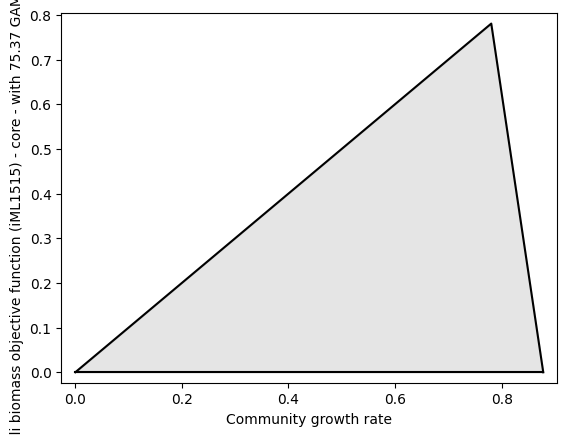

In [25]:
plot_flux_envelope(merged_community, merged_community.biomass_reaction, 'R_BIOMASS_Ec_iML1515_core_75p37M_CAL2', constraints=medium)

<AxesSubplot: xlabel='Community growth rate'>

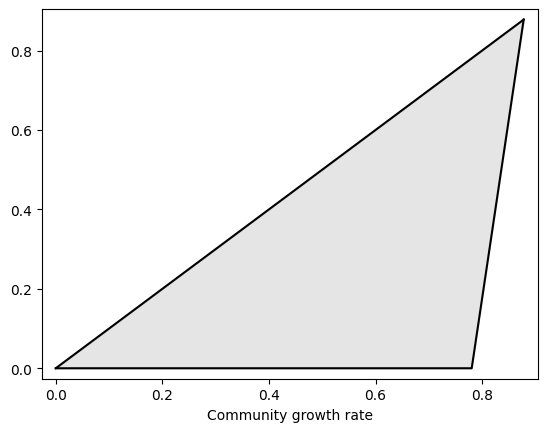

In [27]:
plot_flux_envelope(merged_community, merged_community.biomass_reaction, 'R_BIOMASS_Ec_iHK1487_core_SAL9', constraints=medium)

<AxesSubplot: xlabel='Community growth rate', ylabel='E. coli biomass objective function (iML1515) - core - with 75.37 GAM estimate'>

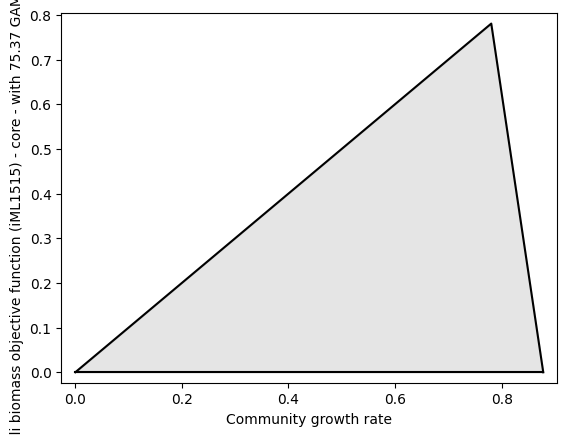

In [28]:
plot_flux_envelope(merged_community, merged_community.biomass_reaction, 'R_BIOMASS_Ec_iML1515_core_75p37M_MAM2', constraints=medium)

- the FBA solution heavily favours SAL9
    - this is because the BL21 model biomass reaction has a lower ATP requirement + lower ATP maintanace requirement

### Production envelope for rosmarinic acid

<AxesSubplot: xlabel='Community growth rate', ylabel='R_EX_rosma_e'>

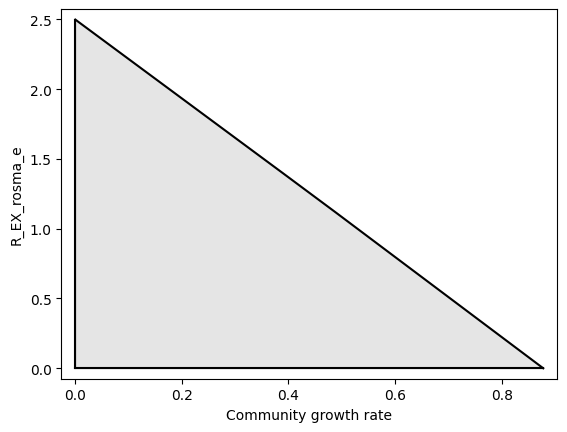

In [22]:
plot_flux_envelope(merged_community, merged_community.biomass_reaction, 'R_EX_rosma_e', constraints=medium)

- the envelope shows that there will be no RA production when optimising for community biomass since there is no growth-coupling

# Community simulation with SteadyCom

In [29]:
from reframed import SteadyCom

In [42]:
steadycom_solution = SteadyCom(community, constraints=medium)
print(steadycom_solution)

Community growth: 0.9335937500000001
CAL2	0.0
SAL9	1.0
MAM2	0.0


- again, there is no growth for the other strains than SAL9 in the optimal solution -> look into the solution space using FVA

solution without Phe in the medium:

In [41]:
medium_no_phe = medium.copy()
medium_no_phe["R_EX_phe__L_e"] = (0, float("inf"))
solution_no_phe = SteadyCom(community, constraints=medium_no_phe)
print(solution_no_phe)

Community growth: 0.9052734375000001
CAL2	0.0016016384361277293
SAL9	0.9968548827763662
MAM2	0.0015434787875060357


In [46]:
solution_no_phe.cross_feeding(as_df=True).dropna().sort_values("rate", ascending = False)

,donor,receiver,compound,rate
59,SAL9,CAL2,M_glyald_e,1.601638
98,CAL2,SAL9,M_glcn_e,1.601638
57,CAL2,SAL9,M_glyc_e,1.601638
109,SAL9,CAL2,M_asp__L_e,1.601638
39,SAL9,CAL2,M_5dglcn_e,1.601638
...,...,...,...,...
101,CAL2,MAM2,M_gua_e,0.000038
122,CAL2,MAM2,M_uri_e,0.000037
80,SAL9,CAL2,M_kdo2lipid4_e,0.000028
81,SAL9,MAM2,M_kdo2lipid4_e,0.000027


- likely there are now artificially many cross-feedings

## Community FVA with SteadyCom

In [5]:
from reframed import SteadyComVA
com_fva_solution = SteadyComVA(community, constraints=medium, obj_frac=0.99)
print(com_fva_solution)

{'CAL2': [0.0, 0.3569014948658821], 'SAL9': [0.6430985051343256, 1.0], 'MAM2': [0.0, 0.3569014948654754]}


In [90]:
for i in range(950, 1005, 5):
    frac = i/1000
    print(frac)

0.95
0.955
0.96
0.965
0.97
0.975
0.98
0.985
0.99
0.995
1.0


In [6]:
from tqdm.notebook import tqdm
import pandas as pd

results_list = []

for i in tqdm(range(950, 1005, 5)):
    frac = i/1000
    com_fva_solution = SteadyComVA(community, constraints=medium, obj_frac=frac)
    com_fva_solution["frac"] = frac
    results_list.append(com_fva_solution)

results_df = pd.DataFrame(results_list)
results_df.set_index("frac")

  0%|          | 0/11 [00:00<?, ?it/s]

,CAL2,SAL9,MAM2
frac,,,
0.950,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.955,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.960,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.965,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
0.970,"[0.0, 0.9981687365542594]","[0.0018312634455471821, 1.0]","[0.0, 0.9981687365543099]"
0.975,"[0.0, 0.8933574583770978]","[0.10664254161602571, 1.0]","[0.0, 0.8933574583957693]"
0.980,"[0.0, 0.7131886314965104]","[0.28681136850543965, 1.0]","[0.0, 0.713188631497033]"
0.985,"[0.0, 0.5343750550652877]","[0.46562494493365847, 1.0]","[0.0, 0.534375055066711]"
0.990,"[0.0, 0.3569014948658821]","[0.6430985051343256, 1.0]","[0.0, 0.3569014948654754]"


<AxesSubplot: xlabel='frac', ylabel='growth rate'>

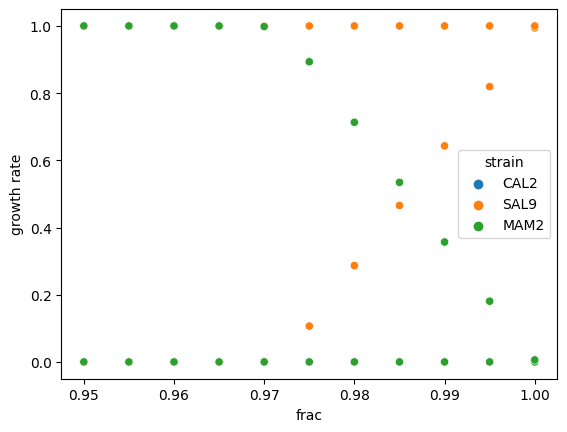

In [7]:
import seaborn as sns

plot_df = results_df.explode(["CAL2", "SAL9", "MAM2"])
df_melt = plot_df.melt('frac', var_name='strain', value_name='growth rate')

sns.scatterplot(data=df_melt, x="frac", y="growth rate", hue="strain")

## PhPP using cobrapy

Phenotype phase-plane plots, using cobrapy

In [45]:
from cobra.io import read_sbml_model

cobrapy_ra_com = read_sbml_model('../GEMs/merged_ra_com.xml')

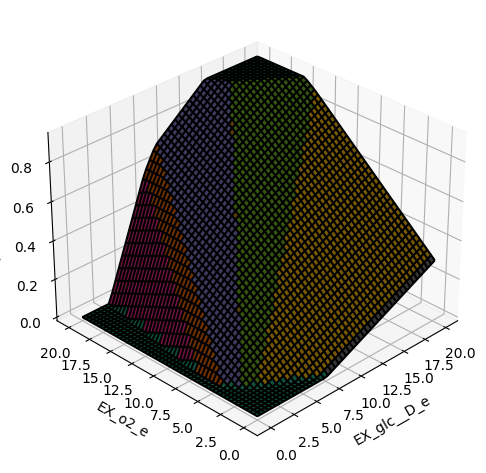

In [46]:
from phpp import PhPP
import numpy as np
import sys
import warnings

#in order to ignore UserWarning: Solver status is 'infeasible' for non-solutions 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#evenly distributed values between 0 and -20 with 50 datapoints
flux_range = np.linspace(0.0, -20, num=50)

phasePlane = PhPP(cobrapy_ra_com, "EX_glc__D_e", "EX_o2_e", flux_range, flux_range)

#plot the phenotype phase plane for oxygen and glucose
phasePlane.plot_PhPP()